### Step 1: Load the Titanic Dataset
We start by loading the Titanic dataset using Seaborn.  
This dataset contains information about passengers such as age, class, fare, and survival status.  
It’s a great example for demonstrating data cleaning because it includes missing values, categorical variables, and numerical features.


In [9]:
import pandas as pd
import seaborn as sns
from dskit import cleaning

# Load Titanic dataset
df = sns.load_dataset("titanic")
print("Original shape:", df.shape)
df.head()

Original shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Step 2: Clean Column Names
Column names often contain spaces, uppercase letters, or special characters that make them hard to work with.  
Using `rename_columns_auto`, we standardize them by:
- Converting to lowercase
- Replacing spaces with underscores
- Removing special characters  

This ensures consistency and makes coding easier.

In [10]:
df_cleaned = cleaning.rename_columns_auto(df)
print("Renamed Columns:", df_cleaned.columns.tolist())

Renamed Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


### Step 3: Summarize Missing Values
Real-world datasets almost always have missing values.  
The `missing_summary` function helps us quickly identify:
- How many missing values each column has
- The percentage of missing values relative to the dataset size  

This summary guides us in deciding how to handle missing data.

In [11]:
missing_summary = cleaning.missing_summary(df_cleaned)
missing_summary

,Missing Count,Missing %
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467


### Step 4: Fill Missing Values
Once we know where the missing values are, we need to handle them.  
The `fill_missing` function provides multiple strategies:
- Mean or median for numeric columns
- Mode for categorical columns
- Forward/backward fill for sequential data
- Constant values if specified  

Here, we use the `auto` strategy, which intelligently chooses the best method for each column.


In [12]:
df_filled = cleaning.fill_missing(df_cleaned, strategy="auto")
df_filled.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### Step 5: Detect Outliers
Outliers are extreme values that can distort analysis and models.  
The `outlier_summary` function detects them using:
- IQR method: values outside 1.5× the interquartile range
- Z-score method: values more than 3 standard deviations from the mean  

This helps us understand which columns contain unusual values.

In [13]:
outliers = cleaning.outlier_summary(df_filled, method="iqr")
outliers

parch    213
fare     116
age       66
sibsp     46
Name: Outlier Count, dtype: int64

### Step 6: Remove Outliers
After detecting outliers, we can remove them to make the dataset more robust.  
The `remove_outliers` function filters rows that fall outside the acceptable range.  
This step reduces noise and improves the reliability of statistical analysis and machine learning models.

In [14]:
df_no_outliers = cleaning.remove_outliers(df_filled, method="iqr")
print("Shape after removing outliers:", df_no_outliers.shape)

Shape after removing outliers: (561, 15)


### Step 6a: Visualize Outlier Removal
To better understand the impact of outlier removal, we can compare the distribution of the **age** column before and after cleaning.  
Histograms are a simple way to see how extreme values affect the overall shape of the data.  

- Before removal: The distribution may show long tails or unusual spikes caused by outliers.  
- After removal: The distribution becomes smoother and more representative of the majority of passengers.  

This visualization helps confirm that our cleaning step improves data quality without losing important information.

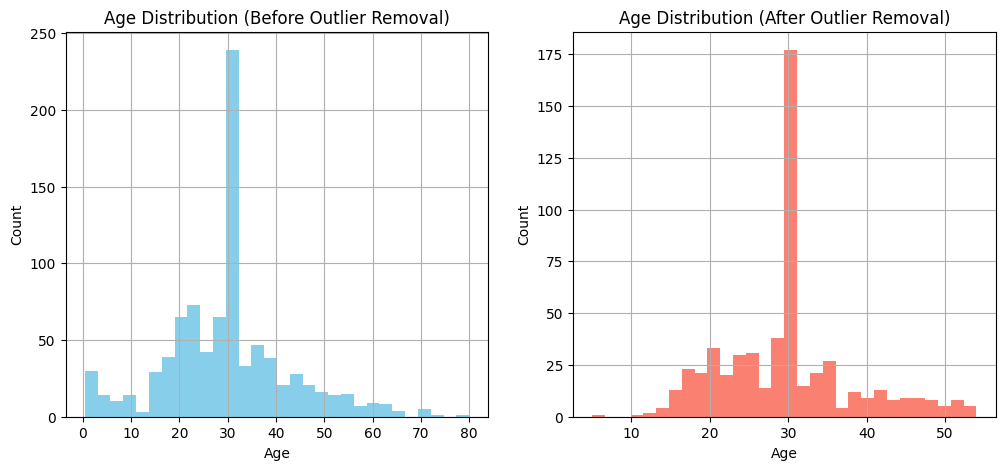

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

#Before Outlier Removal
plt.subplot(1,2,1)
df_filled['age'].hist(bins=30, color='skyblue')
plt.title("Age Distribution (Before Outlier Removal)")
plt.xlabel("Age")
plt.ylabel("Count")

plt.subplot(1,2,2)
df_no_outliers['age'].hist(bins=30, color='salmon')
plt.title("Age Distribution (After Outlier Removal)")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

### Step 7: Clean Text Columns
Text data often contains inconsistencies like uppercase letters, punctuation, or extra spaces.  
The `simple_nlp_clean` function standardizes text by:
- Converting to lowercase
- Removing punctuation
- Stripping extra spaces  

This makes text columns easier to analyze and prepares them for NLP tasks.

In [16]:
df_text_cleaned = cleaning.simple_nlp_clean(df_no_outliers, text_cols=["embark_town"])
df_text_cleaned[["embark_town"]].head()

,embark_town
0,southampton
2,southampton
3,southampton
4,southampton
5,queenstown


### Conclusion
In this demo, we applied the `cleaning.py` functions to the Titanic dataset.  
We saw how to:
- Standardize column names
- Summarize and fill missing values
- Detect and remove outliers
- Clean text columns

Together, these steps show how `dskit.cleaning` simplifies common data preprocessing tasks, making datasets ready for analysis or modeling.
